# Aktivio Food Image Classification

## A. Import Library and Data

### 1. Install & Import Package

In [1]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.1 MB/s eta 0:00:00


In [2]:
import os
import shutil
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile

from PIL import Image
from keras.utils import image_dataset_from_directory
from keras.applications import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input

from keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

# Print TensorFlow version
print(tf.__version__)

2.15.0


### 2. Downloading the Dataset

In [3]:
!gdown 14aeuFRN8b3DQ5Grqd8CfEgNzbLKWXO3V

Downloading...
From (original): https://drive.google.com/uc?id=14aeuFRN8b3DQ5Grqd8CfEgNzbLKWXO3V
From (redirected): https://drive.google.com/uc?id=14aeuFRN8b3DQ5Grqd8CfEgNzbLKWXO3V&confirm=t&uuid=92296bff-e6fa-47c0-8529-03772da4f56b
To: /content/aktivio39label.zip
100% 449M/449M [00:06<00:00, 74.1MB/s]


### 3. Directory Cleanup

In [4]:
if os.path.exists('./Data'):
    shutil.rmtree('./Data')

### 4. Function to Extract ZIP File

In [5]:
# Fungsi untuk mengekstrak file zip ke direktori tertentu
def extract_zip(zip_file, extract_to):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Hapus direktori jika sudah ada sebelumnya
if os.path.exists('./Data'):
    shutil.rmtree('./Data')

# Ekstrak file zip ke direktori Data
extract_zip('aktivio39label.zip', './Data/')


## B. Preprocessing Data

### 1. Count Image Food


In [6]:
# Count Image Food
list_food = ['Ayam Goreng','Bakso','bakwan','batagor','bihun goreng','Bubur Ayam','ca sayur','cake','cumi asam manis','cumi goreng tepung','dimsum','donat','gado gado',
'ikan goreng','kentang goreng','martabak','Mi Goreng','mie ayam','nasi goreng','nasi kuning','nasi padang','Nasi Putih','pecel',
'pempek','pepes ikan','perkedel','rawon','rendang','salad buah','Sate','sayur asem','singkong goreng','sop daging sapi',
'Soto', 'Telur Dadar', 'Telur Mata Sapi', 'tempe goreng','tongseng kambing','yoghurt']

source_path = './Data'

def food_img_count(food):
    source_path_food = os.path.join(source_path, food)
    # os.listdir returns a list containing all files under the given path
    print(f"There are {len(os.listdir(source_path_food))} images of {food}.")

for food in list_food:
    food_img_count(food)

There are 100 images of Ayam Goreng.
There are 100 images of Bakso.
There are 100 images of bakwan.
There are 100 images of batagor.
There are 100 images of bihun goreng.
There are 100 images of Bubur Ayam.
There are 100 images of ca sayur.
There are 100 images of cake.
There are 100 images of cumi asam manis.
There are 100 images of cumi goreng tepung.
There are 100 images of dimsum.
There are 100 images of donat.
There are 100 images of gado gado.
There are 100 images of ikan goreng.
There are 100 images of kentang goreng.
There are 100 images of martabak.
There are 100 images of Mi Goreng.
There are 100 images of mie ayam.
There are 100 images of nasi goreng.
There are 100 images of nasi kuning.
There are 100 images of nasi padang.
There are 100 images of Nasi Putih.
There are 100 images of pecel.
There are 100 images of pempek.
There are 100 images of pepes ikan.
There are 100 images of perkedel.
There are 100 images of rawon.
There are 100 images of rendang.
There are 100 images o

### 2. Split Data


*   Split data training 70%
*   Split data validation 30%




In [8]:
import random
# Daftar kategori makanan
list_food = ['Ayam Goreng', 'Bakso', 'bakwan', 'batagor', 'bihun goreng', 'Bubur Ayam', 'ca sayur', 'cake', 'cumi asam manis', 'cumi goreng tepung', 'dimsum', 'donat', 'gado gado',
             'ikan goreng', 'kentang goreng', 'martabak', 'Mi Goreng', 'mie ayam', 'nasi goreng', 'nasi kuning', 'nasi padang', 'Nasi Putih', 'pecel',
             'pempek', 'pepes ikan', 'perkedel', 'rawon', 'rendang', 'salad buah', 'Sate', 'sayur asem', 'singkong goreng', 'sop daging sapi',
             'Soto', 'Telur Dadar', 'Telur Mata Sapi', 'tempe goreng', 'tongseng kambing', 'yoghurt']

# Path sumber data
source_path = './Data'
train_path = './trainval/train'
val_path = './trainval/val'

# Buat direktori train dan val
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)

# Fungsi untuk memisahkan data ke dalam folder train dan val
def split_data(food):
    source_path_food = os.path.join(source_path, food)
    images = os.listdir(source_path_food)
    random.shuffle(images)
    train_images = images[:70]
    val_images = images[70:100]

    train_food_path = os.path.join(train_path, food)
    val_food_path = os.path.join(val_path, food)

    os.makedirs(train_food_path, exist_ok=True)
    os.makedirs(val_food_path, exist_ok=True)

    for img in train_images:
        shutil.copy(os.path.join(source_path_food, img), os.path.join(train_food_path, img))

    for img in val_images:
        shutil.copy(os.path.join(source_path_food, img), os.path.join(val_food_path, img))

# Pisahkan data untuk setiap kategori makanan
for food in list_food:
    split_data(food)

In [9]:
# Fungsi untuk menghitung gambar di setiap kategori
def count_images():
    original_counts = {food: len(os.listdir(os.path.join(source_path, food))) for food in list_food}
    train_counts = {food: len(os.listdir(os.path.join(train_path, food))) for food in list_food}
    val_counts = {food: len(os.listdir(os.path.join(val_path, food))) for food in list_food}

    for food in list_food:
        print(f"Original {food}'s directory has {original_counts[food]} images")
        print(f"There are {train_counts[food]} images of {food} for training")
        print(f"There are {val_counts[food]} images of {food} for validation")
        print("")  # Tambahkan baris kosong untuk spasi antar kategori

# Memanggil fungsi untuk menghitung dan mencetak hasil
count_images()

Original Ayam Goreng's directory has 100 images
There are 70 images of Ayam Goreng for training
There are 30 images of Ayam Goreng for validation

Original Bakso's directory has 100 images
There are 70 images of Bakso for training
There are 30 images of Bakso for validation

Original bakwan's directory has 100 images
There are 70 images of bakwan for training
There are 30 images of bakwan for validation

Original batagor's directory has 100 images
There are 70 images of batagor for training
There are 30 images of batagor for validation

Original bihun goreng's directory has 100 images
There are 70 images of bihun goreng for training
There are 30 images of bihun goreng for validation

Original Bubur Ayam's directory has 100 images
There are 70 images of Bubur Ayam for training
There are 30 images of Bubur Ayam for validation

Original ca sayur's directory has 100 images
There are 70 images of ca sayur for training
There are 30 images of ca sayur for validation

Original cake's directory

### 3. Image Augmentation

In [10]:
# Parameter untuk pembuatan dataset
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
img_width = 224
img_height = 224

# Dataset untuk pelatihan
train_ds = image_dataset_from_directory(
    directory=train_path,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    labels='inferred',
    label_mode='int'
)

# Dataset untuk validasi
val_ds = image_dataset_from_directory(
    directory=val_path,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    labels='inferred',
    label_mode='int'
)

Found 2730 files belonging to 39 classes.
Found 1170 files belonging to 39 classes.


In [11]:
class_names = val_ds.class_names
class_names

['Ayam Goreng',
 'Bakso',
 'Bubur Ayam',
 'Mi Goreng',
 'Nasi Putih',
 'Sate',
 'Soto',
 'Telur Dadar',
 'Telur Mata Sapi',
 'bakwan',
 'batagor',
 'bihun goreng',
 'ca sayur',
 'cake',
 'cumi asam manis',
 'cumi goreng tepung',
 'dimsum',
 'donat',
 'gado gado',
 'ikan goreng',
 'kentang goreng',
 'martabak',
 'mie ayam',
 'nasi goreng',
 'nasi kuning',
 'nasi padang',
 'pecel',
 'pempek',
 'pepes ikan',
 'perkedel',
 'rawon',
 'rendang',
 'salad buah',
 'sayur asem',
 'singkong goreng',
 'sop daging sapi',
 'tempe goreng',
 'tongseng kambing',
 'yoghurt']

### 4. Visualizing validation images with labels

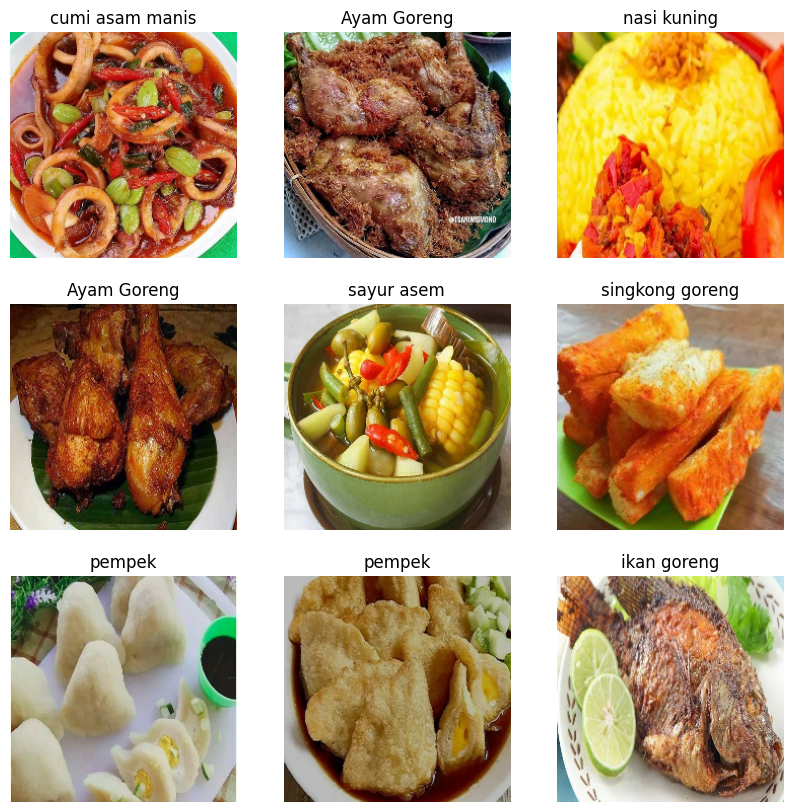

In [12]:
# Buat sebuah gambar dengan ukuran 10x10 inci
plt.figure(figsize=(10,10))

# Iterasi melalui batch pertama gambar dan label dalam dataset validasi
for image, labels in val_ds.take(1):
    # Iterasi melalui 9 gambar dalam batch
    for i in range(0, 9):
        # Buat subplot dalam grid 3x3
        plt.subplot(3, 3, i+1)

        plt.imshow((image[i]).numpy().astype("uint8"))

        plt.title(class_names[labels[i]])

        plt.axis('off')

# Show the plot
plt.show()

### 5. Normalize the train and validation iamges

In [13]:
# Preprocess the images
train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))

### 6. checking validation images

[[[ 0.26340282  0.19866192  0.09769905]
  [ 0.1367172   0.04259956 -0.06720436]
  [ 0.09672618 -0.02305675 -0.13499647]
  ...
  [ 0.531245    0.347286    0.31733894]
  [ 0.61805654  0.33754992  0.24947858]
  [ 0.6090226   0.26378214  0.07140911]]

 [[ 0.32873404  0.26399314  0.16303027]
  [ 0.1426096   0.04849195 -0.06131202]
  [ 0.04946983 -0.0703131  -0.18225288]
  ...
  [ 0.45382822  0.23380935  0.17269218]
  [ 0.46143246  0.16159642  0.05180907]
  [ 0.4347831   0.07118785 -0.11250657]]

 [[ 0.3212384   0.25649762  0.15553474]
  [ 0.22633553  0.13221788  0.02241385]
  [ 0.10180569 -0.01797718 -0.12991697]
  ...
  [ 0.32527852  0.04516637 -0.06687844]
  [ 0.2810402  -0.07017398 -0.21469527]
  [ 0.23937786 -0.14198238 -0.33899933]]

 ...

 [[ 0.691694    0.5798944   0.48575652]
  [ 0.62538517  0.46439075  0.35458684]
  [ 0.53084993  0.30910623  0.1707834 ]
  ...
  [ 0.8600532   0.7987397   0.70177126]
  [ 0.94546616  0.9189434   0.85805476]
  [ 0.944528    0.94353044  0.9415351 ]]

 [

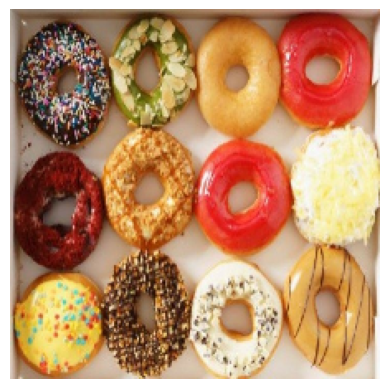

In [16]:
for image,labels in val_ds.take(1):

  for i in range(0,1):
    print((image[i]).numpy())
    print('----------------------------------\n')
    plt.imshow((image[i].numpy() + 1) / 2)
    plt.axis('off')
    print((class_names[labels[i]]))

## C. Training Model

### 1. Configuring MobileNetV2

In [17]:
# Load MobileNetV2 as the base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Set the base model as non-trainable
base_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


### 2. Summary of MobileNetV2

In [19]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

### 3. Build a Model

In [18]:
def build_model_feature_extraction(hp):
    """
    Build a Sequential model for feature extraction using MobileNetV2 as the base model.

    Args:
    - hp (HyperParameters): An instance of HyperParameters class for tuning hyperparameters.

    Returns:
    - model (Sequential): A compiled Keras Sequential model for feature extraction.
    """
    # Create a Sequential model
    model = tf.keras.models.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])

    # Choose learning rate from a predefined list
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


### 4. Hyperparameter Tuning with RandomSearch

In [22]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
tuner = RandomSearch(
    build_model_feature_extraction,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=1,
    directory='./trainval',
    project_name='food_classification_Aktivio'
)

tuner.search(train_ds, epochs=3, validation_data=val_ds)

Trial 3 Complete [00h 06m 05s]
val_accuracy: 0.5538461804389954

Best val_accuracy So Far: 0.7991452813148499
Total elapsed time: 00h 19m 57s


### 5. Hyperparameter Tuning Analysis

In [23]:
# Inisialisasi daftar untuk menyimpan informasi percobaan
trials = []
learning_rates = []
max_val_accuracies = []

directory= './trainval'

# Iterasi melalui setiap direktori dalam direktori yang ditentukan
for root, dirs, files in os.walk(directory):
    for name in dirs:
        if name.startswith("trial_"):
            trial_directory = os.path.join(root, name)

            # Inisialisasi variabel untuk menyimpan data percobaan
            trial_id = None
            learning_rate = None
            max_val_accuracy = None

            # Iterasi melalui setiap file dalam direktori percobaan
            for file_name in os.listdir(trial_directory):
                if file_name.endswith(".json"):
                    file_path = os.path.join(trial_directory, file_name)
                    with open(file_path, 'r') as file:
                        trial_data = json.load(file)

                        # Ekstrak ID percobaan dari nama direktori percobaan
                        trial_id = name

                        # Ekstrak tingkat belajar
                        learning_rate = trial_data['hyperparameters']['values']['learning_rate']

                        # Ekstrak akurasi validasi jika tersedia dan perbarui akurasi_val maksimum
                        if 'val_accuracy' in trial_data['metrics']['metrics']:
                            val_accuracy = trial_data['metrics']['metrics']['val_accuracy']['observations'][0]['value'][0]
                            if max_val_accuracy is None or val_accuracy > max_val_accuracy:
                                max_val_accuracy = val_accuracy

            # Tambahkan data percobaan ke dalam daftar
            trials.append(trial_id)
            learning_rates.append(learning_rate)
            max_val_accuracies.append(max_val_accuracy)

# Buat DataFrame dari informasi yang terkumpul
data = {
    'Trial': trials,
    'Learning Rate': learning_rates,
    'Max Validation Accuracy': max_val_accuracies
}

df = pd.DataFrame(data)
df

,Trial,Learning Rate,Max Validation Accuracy
0,trial_2,0.0100,0.553846
1,trial_1,0.0010,0.799145
2,trial_0,0.0001,0.681197


### 6. Get the best hyperparameters

In [24]:
# Get the best hyperparameters from the tuner
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Retrieve the best learning rate from the best hyperparameters
base_learning_rate = best_hps.get('learning_rate')


### 7. Bulid Model from feature extraction and best hyperparameters

In [25]:
# Build the model using the best hyperparameters for feature extraction
model = build_model_feature_extraction(best_hps)

# Print a summary of the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               655872    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)              

### 8. Visualize the model architecture

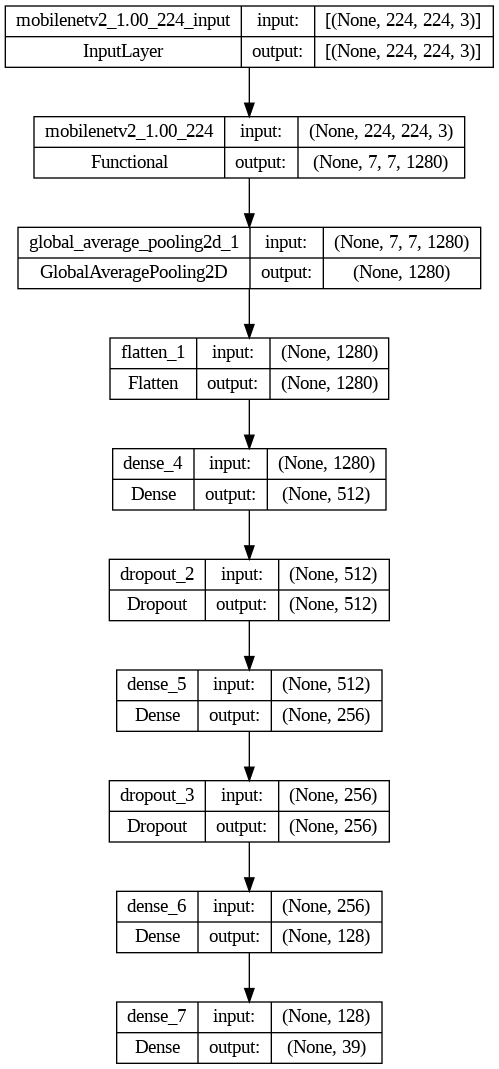

In [26]:
tf.keras.utils.plot_model(model, show_shapes=True)

### 9. Early Stopping Configuration

In [27]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

### 10. Model Training with Feature Extraction

In [23]:
epochs_size = 20
print("Ekstraksi Fitur\n")

# Latih model dengan ekstraksi fitur dan early stopping
history_feature_extraction = model.fit(train_ds, epochs=epochs_size, validation_data=val_ds, callbacks=early_stopping)

Ekstraksi Fitur

Epoch 1/20
86/86 [==============================] - 19s 161ms/step - loss: 2.2718 - accuracy: 0.3795 - val_loss: 1.0222 - val_accuracy: 0.7051
Epoch 2/20
86/86 [==============================] - 15s 169ms/step - loss: 0.8561 - accuracy: 0.7370 - val_loss: 0.7258 - val_accuracy: 0.7821
Epoch 3/20
86/86 [==============================] - 14s 151ms/step - loss: 0.5454 - accuracy: 0.8366 - val_loss: 0.7001 - val_accuracy: 0.7966
Epoch 4/20
86/86 [==============================] - 14s 152ms/step - loss: 0.3436 - accuracy: 0.8875 - val_loss: 0.6220 - val_accuracy: 0.8205
Epoch 5/20
86/86 [==============================] - 14s 157ms/step - loss: 0.2667 - accuracy: 0.9121 - val_loss: 0.6098 - val_accuracy: 0.8291
Epoch 6/20
86/86 [==============================] - 14s 156ms/step - loss: 0.1936 - accuracy: 0.9392 - val_loss: 0.7025 - val_accuracy: 0.8256
Epoch 7/20
86/86 [==============================] - 15s 172ms/step - loss: 0.1206 - accuracy: 0.9652 - val_loss: 0.6300 - val

### 11. Plot for Accuracy and Loss Comparison

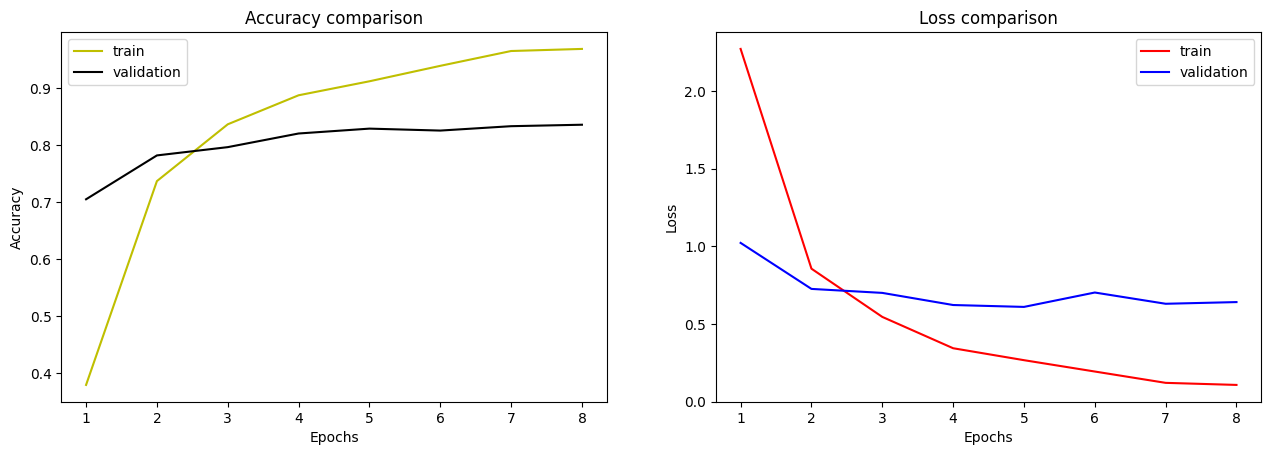

In [24]:
epochs = range(1, len(history_feature_extraction.history['accuracy']) + 1)

# Plot accuracy and loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history_feature_extraction.history['accuracy'], color='y', label='train')
plt.plot(epochs, history_feature_extraction.history['val_accuracy'], color='k', label='validation')
plt.legend()
plt.title('Accuracy comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, history_feature_extraction.history['loss'], color='r', label='train')
plt.plot(epochs, history_feature_extraction.history['val_loss'], color='b', label='validation')
plt.legend()
plt.title('Loss comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplots_adjust(right=2)
plt.show()

## D. Fine tuning Model

### 1. Configuring fine tuning model

In [ ]:
def build_model_fine_tuning():
    """
    Build a fine-tuning model by allowing training for specific layers of the base model.

    Returns:
    - None
    """
    base_model.trainable = True

    set_trainable = False

    for layer in base_model.layers:
        if layer.name == 'block_6_expand':
            set_trainable = True
        if set_trainable:
            layer.trainable = True
        else:
            layer.trainable = False

### 2. Function to build the fine tuning model

In [ ]:
build_model_fine_tuning()

### 3. Compile the fine tuning model

In [32]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate / 100),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### 4. Summary of the fine tuning model

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               655872    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)              

### 5. Continue training the model

In [32]:
# Hitung jumlah epoch awal berdasarkan panjang riwayat akurasi
initial_epochs = len(history_feature_extraction.history['accuracy'])

# Tentukan jumlah epoch untuk fine-tuning
fine_tune_epochs = 40

# Hitung total jumlah epoch untuk fine-tuning
total_epochs = initial_epochs + fine_tune_epochs

### 6. Model Training with Fine tuning

In [33]:
print("Fine tuning\n")
history_fine_tuning = model.fit(train_ds, epochs=total_epochs, initial_epoch=initial_epochs, validation_data=val_ds, callbacks=early_stopping)

Fine tuning

Epoch 9/48
86/86 [==============================] - 64s 232ms/step - loss: 0.0358 - accuracy: 0.9875 - val_loss: 0.7910 - val_accuracy: 0.8325
Epoch 10/48
86/86 [==============================] - 15s 168ms/step - loss: 0.0222 - accuracy: 0.9949 - val_loss: 0.7347 - val_accuracy: 0.8333
Epoch 11/48
86/86 [==============================] - 15s 166ms/step - loss: 0.0188 - accuracy: 0.9960 - val_loss: 0.7038 - val_accuracy: 0.8462
Epoch 12/48
86/86 [==============================] - 18s 195ms/step - loss: 0.0176 - accuracy: 0.9952 - val_loss: 0.6734 - val_accuracy: 0.8513
Epoch 13/48
86/86 [==============================] - 15s 168ms/step - loss: 0.0123 - accuracy: 0.9971 - val_loss: 0.6481 - val_accuracy: 0.8547
Epoch 14/48
86/86 [==============================] - 16s 183ms/step - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.6333 - val_accuracy: 0.8573
Epoch 15/48
86/86 [==============================] - 17s 185ms/step - loss: 0.0153 - accuracy: 0.9967 - val_loss: 0.6513 - v

### 7. Plot for Accuracy and Loss Comparison

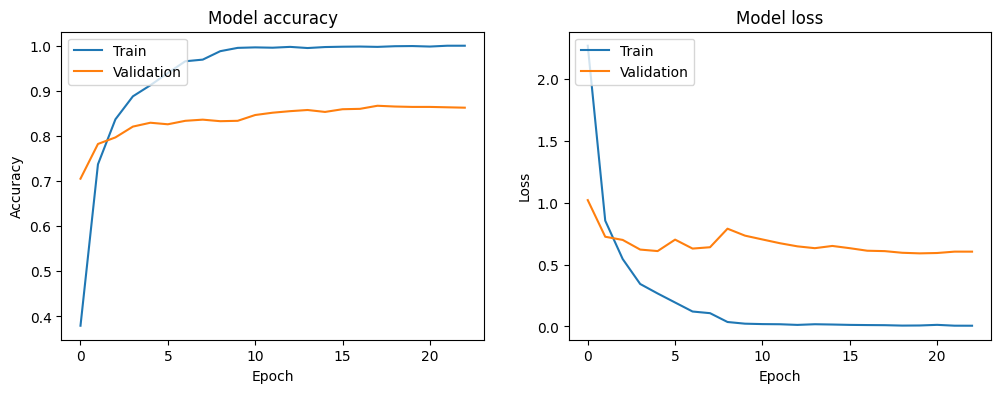

In [34]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_feature_extraction.history['accuracy'] + history_fine_tuning.history['accuracy'])
plt.plot(history_feature_extraction.history['val_accuracy'] + history_fine_tuning.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_feature_extraction.history['loss'] + history_fine_tuning.history['loss'])
plt.plot(history_feature_extraction.history['val_loss'] + history_fine_tuning.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


## E. Predict

In [37]:
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

# Unggah file
uploaded = files.upload()

# Pastikan class_names didefinisikan dengan benar
class_names = class_names

# Prediksi gambar yang diunggah
for fn in uploaded.keys():
    # Path file
    path = '/content/' + fn
    # Load dan proses gambar
    img = load_img(path, target_size=(224, 224))
    x = img_to_array(img)
    x = preprocess_input(x)
    x = np.expand_dims(x, axis=0)
    # Prediksi kelas gambar
    predictions = model.predict(x)
    predicted_class = np.argmax(predictions, axis=1)[0]
    # Mendapatkan nama label dari class_names
    label_name = class_names[predicted_class]
    # Tampilkan hasil prediksi
    print(f"Gambar: {fn}, Prediksi: {label_name}, Probabilitas: {predictions[0][predicted_class]}")


Saving download (3).jpeg to download (3).jpeg
1/1 [==============================] - 0s 23ms/step
Gambar: download (3).jpeg, Prediksi: Sate, Probabilitas: 0.9937552213668823


## F. Save Model

### 1. with HDF5 format

In [39]:
model.save('aktivio9986.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 2. With saved_model format

In [ ]:
model.save('aktivio9986')

In [ ]:
!zip -r /content/aktivio9986.zip /content/aktivio9986

  adding: content/aktivio9986/ (stored 0%)
  adding: content/aktivio9986/saved_model.pb (deflated 91%)
  adding: content/aktivio9986/assets/ (stored 0%)
  adding: content/aktivio9986/variables/ (stored 0%)
  adding: content/aktivio9986/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/aktivio9986/variables/variables.index (deflated 77%)
  adding: content/aktivio9986/fingerprint.pb (stored 0%)
  adding: content/aktivio9986/keras_metadata.pb (deflated 96%)
